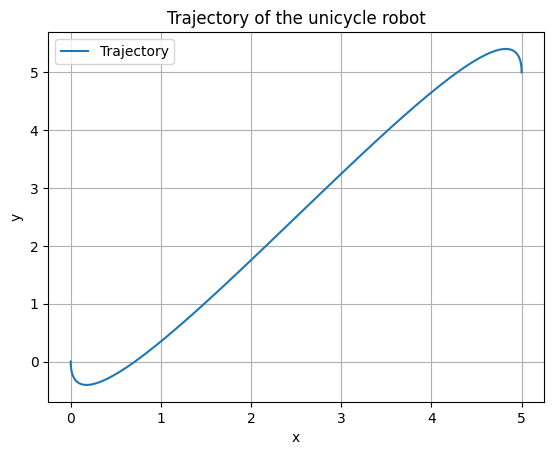

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the time range
t = np.arange(0, 15.1, 0.1)

# Define the basis functions
psi1 = np.ones_like(t)
psi2 = t
psi3 = t**2
psi4 = t**3

# Initial conditions
x_initial = 0
y_initial = 0
v_initial = 0.5
theta_initial = -np.pi/2

# Final conditions
x_final = 5
y_final = 5
v_final = 0.5
theta_final = -np.pi/2

# Create the matrix A using the basis functions at ti=0 and tf=15
A = np.array([
    [psi1[0], psi2[0], psi3[0], psi4[0]],
    [psi1[-1], psi2[-1], psi3[-1], psi4[-1]],
    [0, 1, 2 * psi2[0], 3 * psi3[0]],
    [0, 1, 2 * psi2[-1], 3 * psi3[-1]],
])

# Define the vector b for initial and final conditions
b_x = np.array([x_initial, x_final, v_initial * np.cos(theta_initial), v_final * np.cos(theta_final)])
b_y = np.array([y_initial, y_final, v_initial * np.sin(theta_initial), v_final * np.sin(theta_final)])

# Solve for the coefficients alpha
alpha_x = np.linalg.solve(A, b_x)
alpha_y = np.linalg.solve(A, b_y)

# Evaluate the trajectory
x = alpha_x[0] * psi1 + alpha_x[1] * psi2 + alpha_x[2] * psi3 + alpha_x[3] * psi4
y = alpha_y[0] * psi1 + alpha_y[1] * psi2 + alpha_y[2] * psi3 + alpha_y[3] * psi4

# Plot the trajectory
plt.figure()
plt.plot(x, y, label='Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the unicycle robot')
plt.legend()
plt.grid(True)
plt.show()
